# 
# 
# DIV: 

In [1]:
import numpy as np
import pandas as pd
import os
import csv
import cv2
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
import pickle

In [2]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

## pip install split-folders
import splitfolders 

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img

In [3]:
folder1=r"C:\sagar\ty\sem 6\CV\cp\edited dataset\train\Atopic Dermatitis"
folder2=r"C:\sagar\ty\sem 6\CV\cp\edited dataset\train\Contact Dermatitis"
folder3=r"C:\sagar\ty\sem 6\CV\cp\edited dataset\train\Nummular Dermatitis"

In [4]:
def standard(data):
    mean = np.mean(data)
    std_dev = np.std(data)
    ans=[]
    for i in data:
        s = (i-mean)/std_dev
        ans.append(s)
    return ans

In [6]:

i=0
for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(128,128)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()

    keypoints, descriptors = sift.detectAndCompute(gray, None)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/atopic.csv', mode='a', header=False,index=False)
  
    

descriptor shape  0  :  (3, 128)
descriptor shape  1  :  (23, 128)
descriptor shape  2  :  (9, 128)
descriptor shape  3  :  (34, 128)
descriptor shape  4  :  (18, 128)
descriptor shape  5  :  (9, 128)
descriptor shape  6  :  (47, 128)
descriptor shape  7  :  (15, 128)
descriptor shape  8  :  (15, 128)
descriptor shape  9  :  (34, 128)
descriptor shape  10  :  (106, 128)
descriptor shape  11  :  (7, 128)
descriptor shape  12  :  (14, 128)
descriptor shape  13  :  (3, 128)
descriptor shape  14  :  (9, 128)
descriptor shape  15  :  (32, 128)
descriptor shape  16  :  (95, 128)
descriptor shape  17  :  (2, 128)
descriptor shape  18  :  (20, 128)
descriptor shape  19  :  (15, 128)
descriptor shape  20  :  (10, 128)
descriptor shape  21  :  (37, 128)
descriptor shape  22  :  (25, 128)
descriptor shape  23  :  (8, 128)
descriptor shape  24  :  (19, 128)
descriptor shape  25  :  (21, 128)
descriptor shape  26  :  (6, 128)
descriptor shape  27  :  (53, 128)
descriptor shape  28  :  (31, 128)
des

descriptor shape  252  :  (29, 128)
descriptor shape  253  :  (23, 128)
descriptor shape  254  :  (37, 128)
descriptor shape  255  :  (31, 128)
descriptor shape  256  :  (12, 128)
descriptor shape  257  :  (11, 128)
descriptor shape  258  :  (56, 128)
descriptor shape  259  :  (31, 128)
descriptor shape  260  :  (3, 128)
descriptor shape  261  :  (3, 128)
descriptor shape  262  :  (23, 128)
descriptor shape  263  :  (1, 128)
descriptor shape  264  :  (1, 128)
descriptor shape  265  :  (1, 128)
descriptor shape  266  :  (14, 128)
descriptor shape  267  :  (10, 128)
descriptor shape  268  :  (14, 128)
descriptor shape  269  :  (20, 128)
descriptor shape  270  :  (79, 128)
descriptor shape  271  :  (12, 128)
descriptor shape  272  :  (7, 128)
descriptor shape  273  :  (211, 128)
descriptor shape  274  :  (12, 128)
descriptor shape  275  :  (42, 128)
descriptor shape  276  :  (89, 128)
descriptor shape  277  :  (90, 128)
descriptor shape  278  :  (32, 128)
descriptor shape  279  :  (19, 12

descriptor shape  484  :  (3, 128)
descriptor shape  485  :  (1, 128)
descriptor shape  486  :  (31, 128)
descriptor shape  487  :  (67, 128)
descriptor shape  488  :  (70, 128)
descriptor shape  489  :  (15, 128)
descriptor shape  490  :  (57, 128)
descriptor shape  491  :  (118, 128)
descriptor shape  492  :  (6, 128)
descriptor shape  493  :  (53, 128)
descriptor shape  494  :  (8, 128)
descriptor shape  495  :  (28, 128)
descriptor shape  496  :  (2, 128)
descriptor shape  497  :  (37, 128)
descriptor shape  498  :  (3, 128)
descriptor shape  499  :  (35, 128)
descriptor shape  500  :  (68, 128)
descriptor shape  501  :  (40, 128)
descriptor shape  502  :  (89, 128)
descriptor shape  503  :  (22, 128)
descriptor shape  504  :  (6, 128)
descriptor shape  505  :  (22, 128)
descriptor shape  506  :  (10, 128)
descriptor shape  507  :  (1, 128)
descriptor shape  508  :  (19, 128)
descriptor shape  509  :  (22, 128)
descriptor shape  510  :  (18, 128)
descriptor shape  511  :  (73, 128)

descriptor shape  732  :  (67, 128)
descriptor shape  733  :  (11, 128)
descriptor shape  734  :  (138, 128)
descriptor shape  735  :  (42, 128)
descriptor shape  736  :  (40, 128)
descriptor shape  737  :  (81, 128)
descriptor shape  738  :  (74, 128)
descriptor shape  739  :  (47, 128)
descriptor shape  740  :  (31, 128)
descriptor shape  741  :  (51, 128)
descriptor shape  742  :  (206, 128)
descriptor shape  743  :  (23, 128)
descriptor shape  744  :  (81, 128)
descriptor shape  745  :  (81, 128)
descriptor shape  746  :  (119, 128)
descriptor shape  747  :  (152, 128)
descriptor shape  748  :  (6, 128)
descriptor shape  749  :  (16, 128)
descriptor shape  750  :  (21, 128)
descriptor shape  751  :  (31, 128)
descriptor shape  752  :  (62, 128)
descriptor shape  753  :  (27, 128)
descriptor shape  754  :  (3, 128)
descriptor shape  755  :  (6, 128)
descriptor shape  756  :  (23, 128)
descriptor shape  757  :  (43, 128)
descriptor shape  758  :  (9, 128)
descriptor shape  759  :  (2

descriptor shape  971  :  (97, 128)
descriptor shape  972  :  (49, 128)
descriptor shape  973  :  (12, 128)
descriptor shape  974  :  (316, 128)
descriptor shape  975  :  (146, 128)
descriptor shape  976  :  (145, 128)
descriptor shape  977  :  (19, 128)
descriptor shape  978  :  (13, 128)
descriptor shape  979  :  (129, 128)
descriptor shape  980  :  (5, 128)
descriptor shape  981  :  (1, 128)
descriptor shape  982  :  (2, 128)
descriptor shape  983  :  (2, 128)
descriptor shape  984  :  (19, 128)
descriptor shape  985  :  (61, 128)
descriptor shape  986  :  (31, 128)
descriptor shape  987  :  (4, 128)
descriptor shape  988  :  (235, 128)
descriptor shape  989  :  (4, 128)
descriptor shape  990  :  (30, 128)
descriptor shape  991  :  (77, 128)
descriptor shape  992  :  (87, 128)
descriptor shape  993  :  (5, 128)
descriptor shape  994  :  (57, 128)
descriptor shape  995  :  (61, 128)
descriptor shape  996  :  (5, 128)
descriptor shape  997  :  (53, 128)
descriptor shape  998  :  (2, 1

descriptor shape  1210  :  (31, 128)
descriptor shape  1211  :  (79, 128)
descriptor shape  1212  :  (17, 128)
descriptor shape  1213  :  (54, 128)
descriptor shape  1214  :  (41, 128)
descriptor shape  1215  :  (7, 128)
descriptor shape  1216  :  (40, 128)
descriptor shape  1217  :  (7, 128)
descriptor shape  1218  :  (4, 128)
descriptor shape  1219  :  (14, 128)
descriptor shape  1220  :  (4, 128)
descriptor shape  1221  :  (15, 128)
descriptor shape  1222  :  (3, 128)
descriptor shape  1223  :  (3, 128)
descriptor shape  1224  :  (8, 128)
descriptor shape  1225  :  (34, 128)
descriptor shape  1226  :  (42, 128)
descriptor shape  1227  :  (7, 128)
descriptor shape  1228  :  (6, 128)
descriptor shape  1229  :  (1, 128)
descriptor shape  1230  :  (4, 128)
descriptor shape  1231  :  (5, 128)
descriptor shape  1232  :  (4, 128)
descriptor shape  1233  :  (11, 128)
descriptor shape  1234  :  (3, 128)
descriptor shape  1235  :  (13, 128)
descriptor shape  1236  :  (18, 128)
descriptor shap

descriptor shape  1437  :  (224, 128)
descriptor shape  1438  :  (53, 128)
descriptor shape  1439  :  (48, 128)
descriptor shape  1440  :  (3, 128)
descriptor shape  1441  :  (13, 128)
descriptor shape  1442  :  (21, 128)
descriptor shape  1443  :  (40, 128)
descriptor shape  1444  :  (369, 128)
descriptor shape  1445  :  (21, 128)
descriptor shape  1446  :  (13, 128)
descriptor shape  1447  :  (73, 128)
descriptor shape  1448  :  (40, 128)
descriptor shape  1449  :  (37, 128)
descriptor shape  1450  :  (39, 128)
descriptor shape  1451  :  (53, 128)
descriptor shape  1452  :  (37, 128)
descriptor shape  1453  :  (7, 128)
descriptor shape  1454  :  (81, 128)
descriptor shape  1455  :  (3, 128)
descriptor shape  1456  :  (35, 128)
descriptor shape  1457  :  (50, 128)
descriptor shape  1458  :  (41, 128)
descriptor shape  1459  :  (18, 128)
descriptor shape  1460  :  (50, 128)
descriptor shape  1461  :  (24, 128)
descriptor shape  1462  :  (12, 128)
descriptor shape  1463  :  (10, 128)
de

In [7]:

i=0
for filename in os.listdir(folder2):
    #path
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(128,128)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()

    keypoints, descriptors = sift.detectAndCompute(gray, None)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/contact.csv', mode='a', header=False,index=False)
  

descriptor shape  0  :  (34, 128)
descriptor shape  1  :  (32, 128)
descriptor shape  2  :  (2, 128)
descriptor shape  3  :  (1, 128)
descriptor shape  4  :  (1, 128)
descriptor shape  5  :  (2, 128)
descriptor shape  6  :  (12, 128)
descriptor shape  7  :  (25, 128)
descriptor shape  8  :  (120, 128)
descriptor shape  9  :  (53, 128)
descriptor shape  10  :  (11, 128)
descriptor shape  11  :  (43, 128)
descriptor shape  12  :  (134, 128)
descriptor shape  13  :  (11, 128)
descriptor shape  14  :  (3, 128)
descriptor shape  15  :  (40, 128)
descriptor shape  16  :  (44, 128)
descriptor shape  17  :  (16, 128)
descriptor shape  18  :  (22, 128)
descriptor shape  19  :  (48, 128)
descriptor shape  20  :  (15, 128)
descriptor shape  21  :  (25, 128)
descriptor shape  22  :  (116, 128)
descriptor shape  23  :  (267, 128)
descriptor shape  24  :  (25, 128)
descriptor shape  25  :  (41, 128)
descriptor shape  26  :  (98, 128)
descriptor shape  27  :  (90, 128)
descriptor shape  28  :  (54, 1

descriptor shape  250  :  (135, 128)
descriptor shape  251  :  (43, 128)
descriptor shape  252  :  (20, 128)
descriptor shape  253  :  (65, 128)
descriptor shape  254  :  (16, 128)
descriptor shape  255  :  (38, 128)
descriptor shape  256  :  (5, 128)
descriptor shape  257  :  (55, 128)
descriptor shape  258  :  (2, 128)
descriptor shape  259  :  (70, 128)
descriptor shape  260  :  (121, 128)
descriptor shape  261  :  (7, 128)
descriptor shape  262  :  (7, 128)
descriptor shape  263  :  (38, 128)
descriptor shape  264  :  (104, 128)
descriptor shape  265  :  (2, 128)
descriptor shape  266  :  (1, 128)
descriptor shape  267  :  (113, 128)
descriptor shape  268  :  (10, 128)
descriptor shape  269  :  (53, 128)
descriptor shape  270  :  (34, 128)
descriptor shape  271  :  (102, 128)
descriptor shape  272  :  (66, 128)
descriptor shape  273  :  (6, 128)
descriptor shape  274  :  (4, 128)
descriptor shape  275  :  (46, 128)
descriptor shape  276  :  (203, 128)
descriptor shape  277  :  (6, 

descriptor shape  484  :  (7, 128)
descriptor shape  485  :  (4, 128)
descriptor shape  486  :  (3, 128)
descriptor shape  487  :  (19, 128)
descriptor shape  488  :  (82, 128)
descriptor shape  489  :  (8, 128)
descriptor shape  490  :  (5, 128)
descriptor shape  491  :  (124, 128)
descriptor shape  492  :  (33, 128)
descriptor shape  493  :  (40, 128)
descriptor shape  494  :  (65, 128)
descriptor shape  495  :  (94, 128)
descriptor shape  496  :  (6, 128)
descriptor shape  497  :  (5, 128)
descriptor shape  498  :  (6, 128)
descriptor shape  499  :  (32, 128)
descriptor shape  500  :  (73, 128)
descriptor shape  501  :  (30, 128)
descriptor shape  502  :  (12, 128)
descriptor shape  503  :  (86, 128)
descriptor shape  504  :  (49, 128)
descriptor shape  505  :  (573, 128)
descriptor shape  506  :  (7, 128)
descriptor shape  507  :  (9, 128)
descriptor shape  508  :  (79, 128)
descriptor shape  509  :  (33, 128)
descriptor shape  510  :  (11, 128)
descriptor shape  511  :  (14, 128)


descriptor shape  729  :  (1, 128)
descriptor shape  730  :  (11, 128)
descriptor shape  731  :  (1, 128)
descriptor shape  732  :  (8, 128)
descriptor shape  733  :  (19, 128)
descriptor shape  734  :  (44, 128)
descriptor shape  735  :  (24, 128)
descriptor shape  736  :  (17, 128)
descriptor shape  737  :  (102, 128)
descriptor shape  738  :  (10, 128)
descriptor shape  739  :  (11, 128)
descriptor shape  740  :  (150, 128)
descriptor shape  741  :  (5, 128)
descriptor shape  742  :  (9, 128)
descriptor shape  743  :  (10, 128)
descriptor shape  744  :  (67, 128)
descriptor shape  745  :  (81, 128)
descriptor shape  746  :  (5, 128)
descriptor shape  747  :  (3, 128)
descriptor shape  748  :  (120, 128)
descriptor shape  749  :  (49, 128)
descriptor shape  750  :  (44, 128)
descriptor shape  751  :  (6, 128)
descriptor shape  752  :  (3, 128)
descriptor shape  753  :  (42, 128)
descriptor shape  754  :  (2, 128)
descriptor shape  755  :  (6, 128)
descriptor shape  756  :  (1, 128)
d

descriptor shape  966  :  (35, 128)
descriptor shape  967  :  (18, 128)
descriptor shape  968  :  (12, 128)
descriptor shape  969  :  (4, 128)
descriptor shape  970  :  (5, 128)
descriptor shape  971  :  (12, 128)
descriptor shape  972  :  (42, 128)
descriptor shape  973  :  (2, 128)
descriptor shape  974  :  (4, 128)
descriptor shape  975  :  (107, 128)
descriptor shape  976  :  (17, 128)
descriptor shape  977  :  (47, 128)
descriptor shape  978  :  (49, 128)
descriptor shape  979  :  (6, 128)
descriptor shape  980  :  (2, 128)
descriptor shape  981  :  (26, 128)
descriptor shape  982  :  (29, 128)
descriptor shape  983  :  (44, 128)
descriptor shape  984  :  (27, 128)
descriptor shape  985  :  (35, 128)
descriptor shape  986  :  (7, 128)
descriptor shape  987  :  (41, 128)
descriptor shape  988  :  (57, 128)
descriptor shape  989  :  (30, 128)
descriptor shape  990  :  (39, 128)
descriptor shape  991  :  (26, 128)
descriptor shape  992  :  (51, 128)
descriptor shape  993  :  (82, 128

descriptor shape  1197  :  (43, 128)
descriptor shape  1198  :  (44, 128)
descriptor shape  1199  :  (22, 128)
descriptor shape  1200  :  (46, 128)
descriptor shape  1201  :  (70, 128)
descriptor shape  1202  :  (7, 128)
descriptor shape  1203  :  (25, 128)
descriptor shape  1204  :  (67, 128)
descriptor shape  1205  :  (431, 128)
descriptor shape  1206  :  (237, 128)
descriptor shape  1207  :  (76, 128)
descriptor shape  1208  :  (21, 128)
descriptor shape  1209  :  (101, 128)
descriptor shape  1210  :  (51, 128)
descriptor shape  1211  :  (98, 128)
descriptor shape  1212  :  (10, 128)
descriptor shape  1213  :  (29, 128)
descriptor shape  1214  :  (12, 128)
descriptor shape  1215  :  (24, 128)
descriptor shape  1216  :  (5, 128)
descriptor shape  1217  :  (26, 128)
descriptor shape  1218  :  (14, 128)
descriptor shape  1219  :  (30, 128)
descriptor shape  1220  :  (29, 128)
descriptor shape  1221  :  (31, 128)
descriptor shape  1222  :  (57, 128)
descriptor shape  1223  :  (40, 128)


descriptor shape  1422  :  (3, 128)
descriptor shape  1423  :  (15, 128)
descriptor shape  1424  :  (41, 128)
descriptor shape  1425  :  (111, 128)
descriptor shape  1426  :  (433, 128)
descriptor shape  1427  :  (5, 128)
descriptor shape  1428  :  (53, 128)
descriptor shape  1429  :  (259, 128)
descriptor shape  1430  :  (44, 128)
descriptor shape  1431  :  (12, 128)
descriptor shape  1432  :  (44, 128)
descriptor shape  1433  :  (29, 128)
descriptor shape  1434  :  (30, 128)
descriptor shape  1435  :  (22, 128)
descriptor shape  1436  :  (15, 128)
descriptor shape  1437  :  (63, 128)
descriptor shape  1438  :  (11, 128)
descriptor shape  1439  :  (23, 128)
descriptor shape  1440  :  (6, 128)
descriptor shape  1441  :  (6, 128)
descriptor shape  1442  :  (62, 128)
descriptor shape  1443  :  (44, 128)
descriptor shape  1444  :  (33, 128)
descriptor shape  1445  :  (28, 128)
descriptor shape  1446  :  (66, 128)
descriptor shape  1447  :  (26, 128)
descriptor shape  1448  :  (51, 128)
de

In [8]:

i=0
for filename in os.listdir(folder3):
    #path
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(128,128)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()

    keypoints, descriptors = sift.detectAndCompute(gray, None)
    #convert the descriptor array into a dataframe format
    out=pd.DataFrame(descriptors)
    print("descriptor shape ",i," : ", out.shape)
    i=i+1
    
    #drop first coloumn as it's the no of feature detected. Not required.
    #append to the csv file
    csv_data=out.to_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/nummular.csv', mode='a', header=False,index=False)
  

descriptor shape  0  :  (20, 128)
descriptor shape  1  :  (43, 128)
descriptor shape  2  :  (12, 128)
descriptor shape  3  :  (44, 128)
descriptor shape  4  :  (9, 128)
descriptor shape  5  :  (33, 128)
descriptor shape  6  :  (10, 128)
descriptor shape  7  :  (4, 128)
descriptor shape  8  :  (1, 128)
descriptor shape  9  :  (23, 128)
descriptor shape  10  :  (6, 128)
descriptor shape  11  :  (5, 128)
descriptor shape  12  :  (22, 128)
descriptor shape  13  :  (17, 128)
descriptor shape  14  :  (34, 128)
descriptor shape  15  :  (32, 128)
descriptor shape  16  :  (20, 128)
descriptor shape  17  :  (111, 128)
descriptor shape  18  :  (99, 128)
descriptor shape  19  :  (132, 128)
descriptor shape  20  :  (67, 128)
descriptor shape  21  :  (38, 128)
descriptor shape  22  :  (12, 128)
descriptor shape  23  :  (33, 128)
descriptor shape  24  :  (24, 128)
descriptor shape  25  :  (16, 128)
descriptor shape  26  :  (45, 128)
descriptor shape  27  :  (4, 128)
descriptor shape  28  :  (12, 128)

descriptor shape  247  :  (3, 128)
descriptor shape  248  :  (10, 128)
descriptor shape  249  :  (15, 128)
descriptor shape  250  :  (15, 128)
descriptor shape  251  :  (11, 128)
descriptor shape  252  :  (164, 128)
descriptor shape  253  :  (26, 128)
descriptor shape  254  :  (180, 128)
descriptor shape  255  :  (73, 128)
descriptor shape  256  :  (45, 128)
descriptor shape  257  :  (31, 128)
descriptor shape  258  :  (71, 128)
descriptor shape  259  :  (40, 128)
descriptor shape  260  :  (3, 128)
descriptor shape  261  :  (41, 128)
descriptor shape  262  :  (17, 128)
descriptor shape  263  :  (102, 128)
descriptor shape  264  :  (48, 128)
descriptor shape  265  :  (42, 128)
descriptor shape  266  :  (1, 128)
descriptor shape  267  :  (13, 128)
descriptor shape  268  :  (3, 128)
descriptor shape  269  :  (1, 128)
descriptor shape  270  :  (47, 128)
descriptor shape  271  :  (176, 128)
descriptor shape  272  :  (25, 128)
descriptor shape  273  :  (10, 128)
descriptor shape  274  :  (13

descriptor shape  492  :  (11, 128)
descriptor shape  493  :  (74, 128)
descriptor shape  494  :  (84, 128)
descriptor shape  495  :  (96, 128)
descriptor shape  496  :  (29, 128)
descriptor shape  497  :  (5, 128)
descriptor shape  498  :  (23, 128)
descriptor shape  499  :  (11, 128)
descriptor shape  500  :  (15, 128)
descriptor shape  501  :  (32, 128)
descriptor shape  502  :  (30, 128)
descriptor shape  503  :  (28, 128)
descriptor shape  504  :  (4, 128)
descriptor shape  505  :  (15, 128)
descriptor shape  506  :  (30, 128)
descriptor shape  507  :  (9, 128)
descriptor shape  508  :  (22, 128)
descriptor shape  509  :  (4, 128)
descriptor shape  510  :  (16, 128)
descriptor shape  511  :  (12, 128)
descriptor shape  512  :  (16, 128)
descriptor shape  513  :  (14, 128)
descriptor shape  514  :  (8, 128)
descriptor shape  515  :  (3, 128)
descriptor shape  516  :  (22, 128)
descriptor shape  517  :  (38, 128)
descriptor shape  518  :  (15, 128)
descriptor shape  519  :  (65, 128

descriptor shape  726  :  (1, 128)
descriptor shape  727  :  (21, 128)
descriptor shape  728  :  (30, 128)
descriptor shape  729  :  (42, 128)
descriptor shape  730  :  (31, 128)
descriptor shape  731  :  (6, 128)
descriptor shape  732  :  (6, 128)
descriptor shape  733  :  (53, 128)
descriptor shape  734  :  (29, 128)
descriptor shape  735  :  (13, 128)
descriptor shape  736  :  (30, 128)
descriptor shape  737  :  (57, 128)
descriptor shape  738  :  (77, 128)
descriptor shape  739  :  (9, 128)
descriptor shape  740  :  (5, 128)
descriptor shape  741  :  (47, 128)
descriptor shape  742  :  (42, 128)
descriptor shape  743  :  (19, 128)
descriptor shape  744  :  (24, 128)
descriptor shape  745  :  (17, 128)
descriptor shape  746  :  (20, 128)
descriptor shape  747  :  (23, 128)
descriptor shape  748  :  (38, 128)
descriptor shape  749  :  (17, 128)
descriptor shape  750  :  (22, 128)
descriptor shape  751  :  (43, 128)
descriptor shape  752  :  (23, 128)
descriptor shape  753  :  (6, 128

descriptor shape  955  :  (49, 128)
descriptor shape  956  :  (76, 128)
descriptor shape  957  :  (7, 128)
descriptor shape  958  :  (22, 128)
descriptor shape  959  :  (76, 128)
descriptor shape  960  :  (4, 128)
descriptor shape  961  :  (1, 128)
descriptor shape  962  :  (2, 128)
descriptor shape  963  :  (2, 128)
descriptor shape  964  :  (17, 128)
descriptor shape  965  :  (2, 128)
descriptor shape  966  :  (34, 128)
descriptor shape  967  :  (1, 128)
descriptor shape  968  :  (19, 128)
descriptor shape  969  :  (1, 128)
descriptor shape  970  :  (3, 128)
descriptor shape  971  :  (11, 128)
descriptor shape  972  :  (4, 128)
descriptor shape  973  :  (3, 128)
descriptor shape  974  :  (5, 128)
descriptor shape  975  :  (7, 128)
descriptor shape  976  :  (13, 128)
descriptor shape  977  :  (38, 128)
descriptor shape  978  :  (21, 128)
descriptor shape  979  :  (3, 128)
descriptor shape  980  :  (9, 128)
descriptor shape  981  :  (26, 128)
descriptor shape  982  :  (4, 128)
descript

descriptor shape  1198  :  (9, 128)
descriptor shape  1199  :  (2, 128)
descriptor shape  1200  :  (13, 128)
descriptor shape  1201  :  (23, 128)
descriptor shape  1202  :  (18, 128)
descriptor shape  1203  :  (23, 128)
descriptor shape  1204  :  (27, 128)
descriptor shape  1205  :  (22, 128)
descriptor shape  1206  :  (6, 128)
descriptor shape  1207  :  (4, 128)
descriptor shape  1208  :  (22, 128)
descriptor shape  1209  :  (1, 128)
descriptor shape  1210  :  (17, 128)
descriptor shape  1211  :  (17, 128)
descriptor shape  1212  :  (11, 128)
descriptor shape  1213  :  (14, 128)
descriptor shape  1214  :  (51, 128)
descriptor shape  1215  :  (20, 128)
descriptor shape  1216  :  (2, 128)
descriptor shape  1217  :  (4, 128)
descriptor shape  1218  :  (15, 128)
descriptor shape  1219  :  (4, 128)
descriptor shape  1220  :  (8, 128)
descriptor shape  1221  :  (25, 128)
descriptor shape  1222  :  (7, 128)
descriptor shape  1223  :  (343, 128)
descriptor shape  1224  :  (23, 128)
descriptor

descriptor shape  1430  :  (11, 128)
descriptor shape  1431  :  (6, 128)
descriptor shape  1432  :  (18, 128)
descriptor shape  1433  :  (27, 128)
descriptor shape  1434  :  (8, 128)
descriptor shape  1435  :  (42, 128)
descriptor shape  1436  :  (84, 128)
descriptor shape  1437  :  (47, 128)
descriptor shape  1438  :  (28, 128)
descriptor shape  1439  :  (62, 128)
descriptor shape  1440  :  (31, 128)
descriptor shape  1441  :  (4, 128)
descriptor shape  1442  :  (28, 128)
descriptor shape  1443  :  (87, 128)
descriptor shape  1444  :  (39, 128)
descriptor shape  1445  :  (22, 128)
descriptor shape  1446  :  (14, 128)
descriptor shape  1447  :  (5, 128)
descriptor shape  1448  :  (49, 128)
descriptor shape  1449  :  (3, 128)
descriptor shape  1450  :  (86, 128)
descriptor shape  1451  :  (20, 128)
descriptor shape  1452  :  (2, 128)
descriptor shape  1453  :  (51, 128)
descriptor shape  1454  :  (49, 128)
descriptor shape  1455  :  (16, 128)
descriptor shape  1456  :  (1, 128)
descript

In [9]:
data1 = pd.read_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/atopic.csv',header=None,dtype='uint8')
data1=data1.astype(np.uint8) 
data1

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,58,50,21,3,0,0,18,48,4,12,...,11,14,25,54,64,14,2,2,3,4
1,22,75,34,22,39,13,4,1,41,18,...,4,10,36,44,47,27,14,8,14,4
2,2,5,3,1,1,0,0,0,2,16,...,21,21,12,33,18,14,39,15,18,21
3,47,10,0,0,8,9,2,4,45,11,...,86,60,0,0,0,0,8,41,36,14
4,0,5,22,39,9,0,0,0,0,1,...,1,1,2,114,17,2,9,26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49642,15,65,16,3,1,2,5,7,45,28,...,5,1,18,71,23,9,19,9,1,1
49643,20,43,5,2,20,53,8,1,134,40,...,4,3,4,26,44,2,0,5,11,5
49644,18,12,7,19,69,20,2,2,56,19,...,4,31,74,39,33,42,12,2,1,11
49645,9,1,0,3,12,12,13,32,31,2,...,10,4,13,4,1,1,12,25,51,38


In [10]:
data2 = pd.read_csv(r'C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/contact.csv',header=None,dtype='uint8')

data2=data2.astype(np.uint8) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data2

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,18,6,32,0,0,0,0,11,72,8,...,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,3,0,...,37,0,0,0,0,10,17,6,32,0
2,1,0,0,0,0,0,0,0,133,1,...,3,22,12,19,109,43,7,1,3,29
3,1,0,0,0,1,29,123,17,10,0,...,0,0,13,90,38,12,5,0,0,0
4,27,0,0,0,0,9,23,38,59,1,...,0,0,0,0,87,67,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59353,87,16,1,1,1,0,1,30,58,71,...,2,167,48,3,0,2,2,1,7,48
59354,0,0,0,1,2,16,77,3,0,3,...,95,39,1,0,0,0,1,28,35,14
59355,5,36,32,7,0,0,0,0,1,21,...,16,32,3,32,59,0,0,0,0,1
59356,3,21,34,74,26,1,2,4,12,137,...,11,118,91,6,0,0,0,0,4,64


In [11]:
data3 = pd.read_csv(r'C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/nummular.csv',header=None,dtype='uint8')

data3=data3.astype(np.uint8) 
#as unit8 contain 1 byte(8bit) and ranges from 0 to 255
data3

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,2,7,81,55,0,0,4,15,2,105,...,0,66,20,10,18,21,0,0,0,2
1,28,17,2,1,86,38,0,5,128,69,...,128,37,0,0,0,0,0,0,83,65
2,0,0,16,102,8,0,0,0,0,0,...,1,10,58,19,5,12,20,85,25,22
3,2,81,55,9,26,13,19,12,29,151,...,0,2,0,1,15,23,1,0,0,0
4,2,74,49,15,22,9,16,12,36,156,...,0,3,0,0,22,34,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46260,19,33,15,13,26,30,17,8,25,16,...,107,104,7,3,20,47,111,9,2,4
46261,21,1,1,5,23,18,66,37,95,15,...,19,14,82,39,6,3,5,7,4,46
46262,39,96,58,9,1,2,1,0,70,62,...,12,24,57,61,11,8,10,3,7,16
46263,17,41,34,12,5,9,14,10,3,11,...,50,54,0,4,18,24,16,18,11,3


In [12]:
data=data1.append(data2)

C:\Users\sprat\AppData\Local\Temp\ipykernel_8972\2617308332.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data1.append(data2)


In [13]:
data=data.append(data3)

C:\Users\sprat\AppData\Local\Temp\ipykernel_8972\1666519768.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(data3)


In [14]:
csv_data=data.to_csv(r'C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/allclass.csv', mode='a', header=False,index=False)

In [15]:
data

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,58,50,21,3,0,0,18,48,4,12,...,11,14,25,54,64,14,2,2,3,4
1,22,75,34,22,39,13,4,1,41,18,...,4,10,36,44,47,27,14,8,14,4
2,2,5,3,1,1,0,0,0,2,16,...,21,21,12,33,18,14,39,15,18,21
3,47,10,0,0,8,9,2,4,45,11,...,86,60,0,0,0,0,8,41,36,14
4,0,5,22,39,9,0,0,0,0,1,...,1,1,2,114,17,2,9,26,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46260,19,33,15,13,26,30,17,8,25,16,...,107,104,7,3,20,47,111,9,2,4
46261,21,1,1,5,23,18,66,37,95,15,...,19,14,82,39,6,3,5,7,4,46
46262,39,96,58,9,1,2,1,0,70,62,...,12,24,57,61,11,8,10,3,7,16
46263,17,41,34,12,5,9,14,10,3,11,...,50,54,0,4,18,24,16,18,11,3


# k means

5 : 58232.607382772294
6 : 54388.15221779108
7 : 51410.45197385074
8 : 49181.99774401478
9 : 47186.623754566084
10 : 45627.88751085206
11 : 44250.1227361411
12 : 43119.77641477466
13 : 42022.94131061579
14 : 40791.20398081338
15 : 39803.65728032304
16 : 38587.23566784906
17 : 37636.62052636224
18 : 37187.308215462814
19 : 36204.29656756374
20 : 35388.57331792582
21 : 34765.604035610064
22 : 34262.598311093934
23 : 33586.33730211271
24 : 32998.49667647426
25 : 32387.343864526385
26 : 31939.085233165584
27 : 31529.912728888667
28 : 31081.3809919096
29 : 30874.213366874457
30 : 30281.69250230171


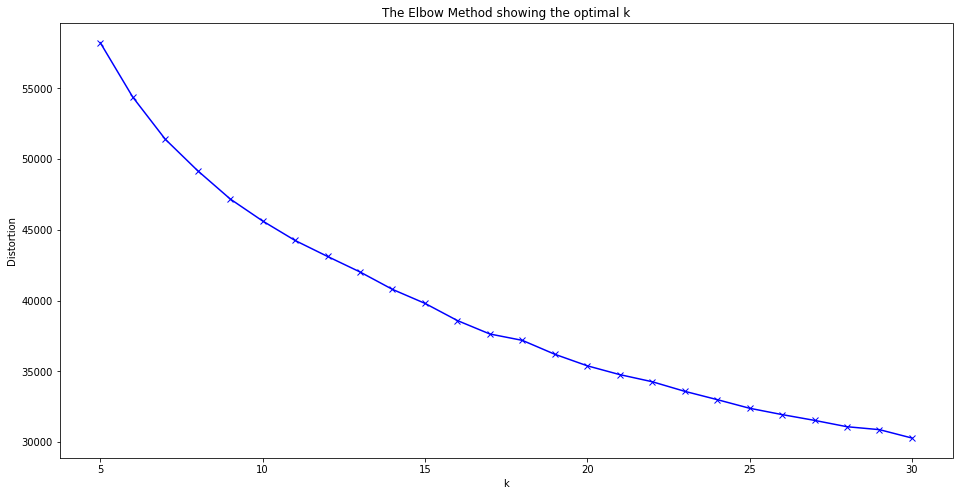

In [98]:
import matplotlib.pyplot as plt
%matplotlib inline 


distortions = []
K = range(5,31)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    print(k,':',kmeanModel.inertia_)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [16]:
data = pd.read_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/allclass.csv')

In [17]:
kmeans = KMeans(n_clusters=19)
kmeans.fit(data)

KMeans(n_clusters=19)

In [18]:
import pickle

# save the model to disk
filename = 'Kmeans_cp_.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [19]:
hist=np.histogram(kmeans.labels_,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

print('histogram of trained kmeans')
print(hist,"\n")

histogram of trained kmeans
(array([ 8820,  6563,  9476,  8382,  7783,  4597,  7610,  9389,  6478,
        7708,  7846,  8843,  9270,  7723,  6668, 10518,  8564, 10540,
        8491,     0], dtype=int64), array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])) 



# Making predictions using the kmeans model we trained
* Atopic is represented as 0
* Contact is represented as 1
* Nummular is represented as 1


In [20]:
#initialising i=0; as its the first class
i=0
data=[]

for filename in os.listdir(folder1):
    #path
    path=os.path.join(folder1,filename)
    a=cv2.imread(path)
    
    #resize image
    resize=(128,128)
    img=cv2.resize(a,resize)
    
    #gray image
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()

    keypoints, descriptors = sift.detectAndCompute(img, None)
    
    out=pd.DataFrame(descriptors)
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    
    data.append(hist[0]/len(keypoints))
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/atopic19.csv', mode='a',header=False,index=False)

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

In [23]:
#initialising i=1; as its the 2nd class
i=1
data=[]
for filename in os.listdir(folder2):
    path=os.path.join(folder2,filename)
    a=cv2.imread(path)
    resize=(128,128)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()

    keypoints, descriptors = sift.detectAndCompute(gray, None)
    
    
    out=pd.DataFrame(descriptors)
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    data.append(hist[0]/len(keypoints))
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/contact19.csv', mode='a',header=False,index=False)

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

In [22]:
#initialising i=2; as its the 3rd class
i=2
data=[]
for filename in os.listdir(folder3):
    path=os.path.join(folder3,filename)
    a=cv2.imread(path)
    resize=(128,128)
    img=cv2.resize(a,resize)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    sift = cv2.SIFT_create()

    keypoints, descriptors = sift.detectAndCompute(gray, None)
    
    
    out=pd.DataFrame(descriptors)
    
    array_double = np.array(out, dtype=np.double)
    a=kmeans.predict(array_double)
    hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])
    data.append(hist[0]/len(keypoints))
    
#convert Array to Dataframe and append to the list
Output = pd.DataFrame(data)
#add row class 
Output["Class"] = i 
csv_data=Output.to_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/nummular19.csv', mode='a',header=False,index=False)

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with

In [24]:
#Displaying the kmeans predicted data
print("Atopic")
dat1= pd.read_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/atopic19.csv',header=None)
print(dat1)

Atopic
            0         1         2         3         4         5         6   \
0     0.000000  0.333333  0.000000  0.000000  0.000000  0.000000  0.000000   
1     0.043478  0.000000  0.173913  0.000000  0.043478  0.000000  0.000000   
2     0.000000  0.000000  0.111111  0.000000  0.111111  0.000000  0.000000   
3     0.000000  0.029412  0.000000  0.000000  0.176471  0.000000  0.029412   
4     0.000000  0.000000  0.000000  0.055556  0.055556  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1484  0.000000  0.000000  0.000000  0.037037  0.185185  0.037037  0.037037   
1485  0.000000  0.000000  0.065934  0.065934  0.054945  0.000000  0.142857   
1486  0.000000  0.032787  0.098361  0.000000  0.032787  0.000000  0.049180   
1487  0.000000  0.021277  0.106383  0.021277  0.063830  0.028369  0.085106   
1488  0.000000  0.000000  0.142857  0.000000  0.000000  0.000000  0.000000   

            7         8         9   ...        11       

In [26]:
print("Contact")
dat2= pd.read_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/contact19.csv',header=None)
print(dat2)

Contact
            0         1         2         3         4         5         6   \
0     0.411765  0.029412  0.000000  0.147059  0.000000  0.029412  0.029412   
1     0.031250  0.031250  0.062500  0.000000  0.062500  0.000000  0.000000   
2     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3     1.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...        ...       ...       ...       ...       ...       ...       ...   
1655  0.000000  0.000000  0.090909  0.272727  0.000000  0.000000  0.000000   
1656  0.004831  0.038647  0.057971  0.067633  0.048309  0.004831  0.062802   
1657  0.000000  0.090090  0.067568  0.054054  0.063063  0.013514  0.063063   
1658  0.322581  0.064516  0.032258  0.064516  0.000000  0.000000  0.096774   
1659  0.000000  0.250000  0.000000  0.000000  0.000000  0.000000  0.000000   

            7         8         9   ...        11      

In [27]:
print("Nummular")
dat3= pd.read_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/nummular19.csv',header=None)
print(dat3)

Nummular
            0         1         2         3         4         5    6   \
0     0.000000  0.100000  0.050000  0.000000  0.000000  0.100000  0.0   
1     0.186047  0.046512  0.046512  0.023256  0.116279  0.162791  0.0   
2     0.000000  0.166667  0.083333  0.000000  0.083333  0.000000  0.0   
3     0.090909  0.181818  0.045455  0.022727  0.000000  0.000000  0.0   
4     0.444444  0.111111  0.000000  0.111111  0.111111  0.000000  0.0   
...        ...       ...       ...       ...       ...       ...  ...   
1645  0.000000  0.500000  0.000000  0.000000  0.000000  0.000000  0.0   
1646  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.0   
1647  0.090909  0.181818  0.181818  0.000000  0.000000  0.000000  0.0   
1648  0.000000  0.235294  0.000000  0.000000  0.000000  0.000000  0.0   
1649  0.000000  0.000000  0.066667  0.066667  0.000000  0.000000  0.0   

            7         8         9   ...        11        12        13  \
0     0.000000  0.000000  0.000000  ...  

In [28]:
A=dat1.append(dat2)
A=A.append(dat3)
csv_data=A.to_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/Final19.csv', mode='a',header=False,index=False)

C:\Users\sprat\AppData\Local\Temp\ipykernel_8972\2683078703.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A=dat1.append(dat2)
C:\Users\sprat\AppData\Local\Temp\ipykernel_8972\2683078703.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  A=A.append(dat3)


In [29]:
A = pd.read_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/Final19.csv')

# Seperating the data into independent(x) and dependent(Y) columns

In [30]:
#independent data/input columns
x = A.iloc[:,0:19].values
x

array([[0.04347826, 0.        , 0.17391304, ..., 0.08695652, 0.13043478,
        0.13043478],
       [0.        , 0.        , 0.11111111, ..., 0.11111111, 0.        ,
        0.        ],
       [0.        , 0.02941176, 0.        , ..., 0.08823529, 0.14705882,
        0.        ],
       ...,
       [0.09090909, 0.18181818, 0.18181818, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.23529412, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06666667, ..., 0.06666667, 0.        ,
        0.06666667]])

In [31]:
#dependent data/output column
y = A.iloc[:,-1].values
y

array([0, 0, 0, ..., 2, 2, 2], dtype=int64)

# Feature Scaling
### Standardization
* It is a scaling technique where the values are centered around the mean with a unit standard deviation

In [32]:
x_scaled = standard(x)

# Dimensionality Reduction
### Principal Component Analaysis
* It is a statistical method by which most of the original data can be summarized using lesser number of dimensions

In [33]:
from sklearn.decomposition import PCA

pca = PCA(n_components=None)
pca.fit(x_scaled)

PCA()

In [34]:
x_reduced = pca.transform(x_scaled)
x_reduced

array([[ 6.42307916e-01, -1.72282428e-01,  1.96689852e-01, ...,
         3.74580671e-01, -3.75884940e-01, -1.10664190e-14],
       [ 2.08443017e-02, -2.51912870e+00, -3.15736535e+00, ...,
        -3.90611462e-01, -6.96652578e-01, -8.81625933e-15],
       [ 1.07137812e+00, -3.16475342e-01,  6.19633574e-01, ...,
        -3.98022599e-01, -9.46905634e-01, -1.05926162e-14],
       ...,
       [ 7.35114851e-01,  5.57537253e-01, -2.56729975e-01, ...,
        -3.55351293e-01,  6.62398219e-02, -1.00930158e-14],
       [ 3.01025983e+00,  1.62601218e+00,  3.98450689e-01, ...,
        -3.20667367e-01,  1.28775437e-01, -9.81546005e-15],
       [ 1.47119116e+00, -8.20308302e-02, -1.67228690e-01, ...,
        -2.56737658e-01,  2.23939915e-01, -1.08343498e-14]])

In [35]:
x_reduced = pd.DataFrame(x_reduced)
x_reduced

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,0.642308,-0.172282,0.196690,-0.366378,-0.329831,-1.130460,0.225044,0.208394,0.545675,0.119764,1.087233,-0.368176,-0.423436,-0.547282,0.330546,0.670912,0.374581,-0.375885,-1.106642e-14
1,0.020844,-2.519129,-3.157365,1.680316,-2.418540,1.321382,-0.220434,-0.256354,-0.004351,-0.528425,-0.653182,-0.012767,0.303219,-0.877733,-0.258976,0.083981,-0.390611,-0.696653,-8.816259e-15
2,1.071378,-0.316475,0.619634,-0.390482,-0.296035,-1.310301,-0.705208,0.206433,-0.757351,1.230030,-0.100013,-0.487167,0.403625,-0.269082,-0.631196,0.070029,-0.398023,-0.946906,-1.059262e-14
3,-0.021560,-1.892339,-1.644435,0.319321,-0.965391,0.054333,-0.180150,-0.420743,-0.072309,-0.720508,-1.492338,0.156052,-0.763531,0.275192,0.728385,-0.589929,1.525054,-0.010144,-8.834752e-15
4,-0.076899,0.522930,0.149357,-1.116684,0.736004,1.007976,-0.572892,0.610171,-0.405918,-1.172267,-0.513739,0.134004,0.700023,0.018982,0.940373,0.269263,-0.696146,-0.106820,-7.372969e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,-0.082089,-0.677594,1.547366,-2.576884,-0.422356,1.692539,-2.087266,-0.178089,-3.524301,0.057811,1.351669,0.286606,-0.362712,-0.111515,0.013606,-0.299266,-0.251414,0.081643,-8.705237e-15
4794,2.248436,1.024495,1.939210,2.093070,-0.104259,-0.592154,-0.021935,0.770724,-0.336870,0.544575,0.109985,0.769873,-1.369155,0.180442,-0.294565,0.078198,-0.545865,0.034488,-9.190960e-15
4795,0.735115,0.557537,-0.256730,-0.666819,-0.653183,0.579472,-0.657599,-0.619106,-0.965342,-0.260574,1.516074,0.690293,-0.633041,-1.032603,-0.057257,-0.178185,-0.355351,0.066240,-1.009302e-14
4796,3.010260,1.626012,0.398451,-1.217785,-0.088733,0.914557,-0.912508,0.047943,-1.208959,-0.129843,0.245234,0.072952,-0.247792,-0.088584,0.089349,-0.398775,-0.320667,0.128775,-9.815460e-15


In [36]:
x_reduced.shape

(4798, 19)

In [37]:
pca.explained_variance_ratio_ 

array([2.00964466e-01, 1.63300635e-01, 9.76849634e-02, 7.81676134e-02,
       6.64160721e-02, 6.18907853e-02, 4.08563406e-02, 3.83074865e-02,
       3.57514867e-02, 3.50322241e-02, 3.33712620e-02, 2.44374297e-02,
       2.35415120e-02, 2.26945990e-02, 2.18820406e-02, 2.08178271e-02,
       2.00902412e-02, 1.47930156e-02, 4.71924186e-30])

In [41]:
h = [2.00964466e-01, 1.63300635e-01, 9.76849634e-02, 7.81676134e-02,
       6.64160721e-02, 6.18907853e-02, 4.08563406e-02, 3.83074865e-02,
       3.57514867e-02, 3.50322241e-02, 3.33712620e-02, 2.44374297e-02,
       2.35415120e-02, 2.26945990e-02, 2.18820406e-02, 2.08178271e-02,
       2.00902412e-02]
sum(h)

0.9852069847

In [42]:
pca = PCA(n_components=17)
pca.fit(x_scaled)

PCA(n_components=17)

In [43]:
pickle.dump(pca, open("pca.pkl","wb"))

In [44]:
x_reduced = pca.transform(x_scaled)
x_reduced

array([[ 0.64230792, -0.17228243,  0.19668985, ...,  0.33054559,
         0.67091164,  0.37458067],
       [ 0.0208443 , -2.5191287 , -3.15736535, ..., -0.2589762 ,
         0.08398139, -0.39061146],
       [ 1.07137812, -0.31647534,  0.61963357, ..., -0.63119614,
         0.07002907, -0.3980226 ],
       ...,
       [ 0.73511485,  0.55753725, -0.25672998, ..., -0.0572566 ,
        -0.17818505, -0.35535129],
       [ 3.01025983,  1.62601218,  0.39845069, ...,  0.08934899,
        -0.39877546, -0.32066737],
       [ 1.47119116, -0.08203083, -0.16722869, ...,  0.79357413,
        -0.59131021, -0.25673766]])

In [45]:
x_reduced.shape

(4798, 17)

In [46]:
print(pca.explained_variance_ratio_) 

[0.20096447 0.16330063 0.09768496 0.07816761 0.06641607 0.06189079
 0.04085634 0.03830749 0.03575149 0.03503222 0.03337126 0.02443743
 0.02354151 0.0226946  0.02188204 0.02081783 0.02009024]


In [65]:
x_reduced = pd.DataFrame(x_reduced)
x_reduced

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.642308,-0.172282,0.196690,-0.366378,-0.329831,-1.130460,0.225044,0.208394,0.545675,0.119764,1.087233,-0.368176,-0.423436,-0.547282,0.330546,0.670912,0.374581
1,0.020844,-2.519129,-3.157365,1.680316,-2.418540,1.321382,-0.220434,-0.256354,-0.004351,-0.528425,-0.653182,-0.012767,0.303219,-0.877733,-0.258976,0.083981,-0.390611
2,1.071378,-0.316475,0.619634,-0.390482,-0.296035,-1.310301,-0.705208,0.206433,-0.757351,1.230030,-0.100013,-0.487167,0.403625,-0.269082,-0.631196,0.070029,-0.398023
3,-0.021560,-1.892339,-1.644435,0.319321,-0.965391,0.054333,-0.180150,-0.420743,-0.072309,-0.720508,-1.492338,0.156052,-0.763531,0.275192,0.728385,-0.589929,1.525054
4,-0.076899,0.522930,0.149357,-1.116684,0.736004,1.007976,-0.572892,0.610171,-0.405918,-1.172267,-0.513739,0.134004,0.700023,0.018982,0.940373,0.269263,-0.696146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,-0.082089,-0.677594,1.547366,-2.576884,-0.422356,1.692539,-2.087266,-0.178089,-3.524301,0.057811,1.351669,0.286606,-0.362712,-0.111515,0.013606,-0.299266,-0.251414
4794,2.248436,1.024495,1.939210,2.093070,-0.104259,-0.592154,-0.021935,0.770724,-0.336870,0.544575,0.109985,0.769873,-1.369155,0.180442,-0.294565,0.078198,-0.545865
4795,0.735115,0.557537,-0.256730,-0.666819,-0.653183,0.579472,-0.657599,-0.619106,-0.965342,-0.260574,1.516074,0.690293,-0.633041,-1.032603,-0.057257,-0.178185,-0.355351
4796,3.010260,1.626012,0.398451,-1.217785,-0.088733,0.914557,-0.912508,0.047943,-1.208959,-0.129843,0.245234,0.072952,-0.247792,-0.088584,0.089349,-0.398775,-0.320667


In [66]:
B=pd.concat([x_reduced, pd.DataFrame(y)],axis=1)
B

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,0
0,0.642308,-0.172282,0.196690,-0.366378,-0.329831,-1.130460,0.225044,0.208394,0.545675,0.119764,1.087233,-0.368176,-0.423436,-0.547282,0.330546,0.670912,0.374581,0
1,0.020844,-2.519129,-3.157365,1.680316,-2.418540,1.321382,-0.220434,-0.256354,-0.004351,-0.528425,-0.653182,-0.012767,0.303219,-0.877733,-0.258976,0.083981,-0.390611,0
2,1.071378,-0.316475,0.619634,-0.390482,-0.296035,-1.310301,-0.705208,0.206433,-0.757351,1.230030,-0.100013,-0.487167,0.403625,-0.269082,-0.631196,0.070029,-0.398023,0
3,-0.021560,-1.892339,-1.644435,0.319321,-0.965391,0.054333,-0.180150,-0.420743,-0.072309,-0.720508,-1.492338,0.156052,-0.763531,0.275192,0.728385,-0.589929,1.525054,0
4,-0.076899,0.522930,0.149357,-1.116684,0.736004,1.007976,-0.572892,0.610171,-0.405918,-1.172267,-0.513739,0.134004,0.700023,0.018982,0.940373,0.269263,-0.696146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,-0.082089,-0.677594,1.547366,-2.576884,-0.422356,1.692539,-2.087266,-0.178089,-3.524301,0.057811,1.351669,0.286606,-0.362712,-0.111515,0.013606,-0.299266,-0.251414,2
4794,2.248436,1.024495,1.939210,2.093070,-0.104259,-0.592154,-0.021935,0.770724,-0.336870,0.544575,0.109985,0.769873,-1.369155,0.180442,-0.294565,0.078198,-0.545865,2
4795,0.735115,0.557537,-0.256730,-0.666819,-0.653183,0.579472,-0.657599,-0.619106,-0.965342,-0.260574,1.516074,0.690293,-0.633041,-1.032603,-0.057257,-0.178185,-0.355351,2
4796,3.010260,1.626012,0.398451,-1.217785,-0.088733,0.914557,-0.912508,0.047943,-1.208959,-0.129843,0.245234,0.072952,-0.247792,-0.088584,0.089349,-0.398775,-0.320667,2


In [67]:
csv_data=B.to_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/FinalPCA19.csv', mode='a',header=False,index=False)

In [120]:
data= pd.read_csv('C:/sagar/ty/sem 6/CV/cp/edited dataset/feature extraction/FinalPCA19.csv',header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.642308,-0.172282,0.196690,-0.366378,-0.329831,-1.130460,0.225044,0.208394,0.545675,0.119764,1.087233,-0.368176,-0.423436,-0.547282,0.330546,0.670912,0.374581,0
1,0.020844,-2.519129,-3.157365,1.680316,-2.418540,1.321382,-0.220434,-0.256354,-0.004351,-0.528425,-0.653182,-0.012767,0.303219,-0.877733,-0.258976,0.083981,-0.390611,0
2,1.071378,-0.316475,0.619634,-0.390482,-0.296035,-1.310301,-0.705208,0.206433,-0.757351,1.230030,-0.100013,-0.487167,0.403625,-0.269082,-0.631196,0.070029,-0.398023,0
3,-0.021560,-1.892339,-1.644435,0.319321,-0.965391,0.054333,-0.180150,-0.420743,-0.072309,-0.720508,-1.492338,0.156052,-0.763531,0.275192,0.728385,-0.589929,1.525054,0
4,-0.076899,0.522930,0.149357,-1.116684,0.736004,1.007976,-0.572892,0.610171,-0.405918,-1.172267,-0.513739,0.134004,0.700023,0.018982,0.940373,0.269263,-0.696146,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4793,-0.082089,-0.677594,1.547366,-2.576884,-0.422356,1.692539,-2.087266,-0.178089,-3.524301,0.057811,1.351669,0.286606,-0.362712,-0.111515,0.013606,-0.299266,-0.251414,2
4794,2.248436,1.024495,1.939210,2.093070,-0.104259,-0.592154,-0.021935,0.770724,-0.336870,0.544575,0.109985,0.769873,-1.369155,0.180442,-0.294565,0.078198,-0.545865,2
4795,0.735115,0.557537,-0.256730,-0.666819,-0.653183,0.579472,-0.657599,-0.619106,-0.965342,-0.260574,1.516074,0.690293,-0.633041,-1.032603,-0.057257,-0.178185,-0.355351,2
4796,3.010260,1.626012,0.398451,-1.217785,-0.088733,0.914557,-0.912508,0.047943,-1.208959,-0.129843,0.245234,0.072952,-0.247792,-0.088584,0.089349,-0.398775,-0.320667,2


In [69]:
x = data.iloc[:,0:17].values
print("X values")
print(x)

y = data.iloc[:,-1]
print("Y values")
print(y)

X values
[[ 0.64230792 -0.17228243  0.19668985 ...  0.33054559  0.67091164
   0.37458067]
 [ 0.0208443  -2.5191287  -3.15736535 ... -0.2589762   0.08398139
  -0.39061146]
 [ 1.07137812 -0.31647534  0.61963357 ... -0.63119614  0.07002907
  -0.3980226 ]
 ...
 [ 0.73511485  0.55753725 -0.25672998 ... -0.0572566  -0.17818505
  -0.35535129]
 [ 3.01025983  1.62601218  0.39845069 ...  0.08934899 -0.39877546
  -0.32066737]
 [ 1.47119116 -0.08203083 -0.16722869 ...  0.79357413 -0.59131021
  -0.25673766]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
4793    2
4794    2
4795    2
4796    2
4797    2
Name: 17, Length: 4798, dtype: int64


In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.20, random_state=10)

# Classification

In [118]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((3838, 17), (3838,), (960, 17), (960,))

### a) Decision Tree Classifier

In [113]:
from sklearn.metrics import accuracy_score
model1 = DecisionTreeClassifier(max_depth=13)
model1.fit(x_train, y_train)
y_pred1 = model1.predict(x_test)
print("Decision Tree Results")
print("Train Accuracy:",model1.score(x_train, y_train))
print("Test Accuracy:",model1.score(x_test, y_test))



Decision Tree Results
Train Accuracy: 0.8569567483064096
Test Accuracy: 0.446875


In [79]:
probs = model1.predict_proba(x_test)


### Using whole Dataset

In [121]:
X = data.iloc[:,0:17].values
print("X values")
print(X)

Y = data.iloc[:,-1]
print("Y values")
print(Y)

X values
[[ 0.64230792 -0.17228243  0.19668985 ...  0.33054559  0.67091164
   0.37458067]
 [ 0.0208443  -2.5191287  -3.15736535 ... -0.2589762   0.08398139
  -0.39061146]
 [ 1.07137812 -0.31647534  0.61963357 ... -0.63119614  0.07002907
  -0.3980226 ]
 ...
 [ 0.73511485  0.55753725 -0.25672998 ... -0.0572566  -0.17818505
  -0.35535129]
 [ 3.01025983  1.62601218  0.39845069 ...  0.08934899 -0.39877546
  -0.32066737]
 [ 1.47119116 -0.08203083 -0.16722869 ...  0.79357413 -0.59131021
  -0.25673766]]
Y values
0       0
1       0
2       0
3       0
4       0
       ..
4793    2
4794    2
4795    2
4796    2
4797    2
Name: 17, Length: 4798, dtype: int64


In [123]:
from sklearn.metrics import accuracy_score
model1 = DecisionTreeClassifier(max_depth=13)
model1.fit(X, Y)
y_pred1 = model1.predict(X)
print("Decision Tree Results")
print("Train Accuracy:",model1.score(X, Y))
#print("Test Accuracy:",model1.score(X, Y))

Decision Tree Results
Train Accuracy: 0.8518132555231347


In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

model2 = RandomForestClassifier(n_estimators = 10)
model2.fit(x_train, y_train)
y_pred2 = model2.predict(x_test)

print("Random Forest Clasifier")
print("Train Accuracy:",model2.score(x_train, y_train))
print("Test Accuracy:",model2.score(x_test, y_test))


Random Forest Clasifier
Train Accuracy: 0.9463262115685253
Test Accuracy: 0.49583333333333335


In [81]:
pickle.dump(model2, open("rf.pkl","wb"))

In [82]:
from sklearn.neighbors import KNeighborsClassifier
model3 = KNeighborsClassifier(n_neighbors = 9)
model3.fit(x_train, y_train)
y_pred3 = model3.predict(x_test)
print("KNN")
print("Train Accuracy:",model3.score(x_train, y_train))
print("Test Accuracy:",model3.score(x_test, y_test))



KNN
Train Accuracy: 0.6086503387180824
Test Accuracy: 0.5270833333333333


In [83]:
pickle.dump(model3, open("knn.pkl","wb"))

In [84]:
from sklearn import svm
model5 = svm.SVC(kernel='linear', probability=True)
model5.fit(x_train, y_train)
y_pred5 = model5.predict(x_test)
print("SVM Linear kernel")
print("Train Accuracy:",model5.score(x_train, y_train))
print("Test Accuracy:",model5.score(x_test, y_test))



SVM Linear kernel
Train Accuracy: 0.5114643043251693
Test Accuracy: 0.496875


In [85]:
probs = model5.predict_proba(x_test)

In [86]:
from sklearn.svm import SVC
model6 = SVC(kernel='poly', degree=3, probability=True)
model6.fit(x_train, y_train)
y_pred6 = model6.predict(x_test)
print("SVM Polynomial")
print("Train Accuracy:",model6.score(x_train, y_train))
print("Test Accuracy:",model6.score(x_test, y_test))


SVM Polynomial
Train Accuracy: 0.5919749869723815
Test Accuracy: 0.484375


In [87]:
from sklearn.svm import SVC
model7 = SVC(kernel='sigmoid', probability=True)
model7.fit(x_train, y_train)
y_pred7 = model7.predict(x_test)
print("SVM sigmoid")
print("Train Accuracy:",model7.score(x_train, y_train))
print("Test Accuracy:",model7.score(x_test, y_test))

SVM sigmoid
Train Accuracy: 0.4187076602397082
Test Accuracy: 0.42604166666666665


In [88]:
from sklearn.svm import SVC
model8 = SVC(kernel='rbf',probability=True)
model8.fit(x_train, y_train)
y_pred8 = model8.predict(x_test)
print("SVM rbf")
print("Train Accuracy:",model8.score(x_train, y_train))
print("Test Accuracy:",model8.score(x_test, y_test))

SVM rbf
Train Accuracy: 0.594059405940594
Test Accuracy: 0.5302083333333333


In [90]:
import xgboost

In [91]:
from xgboost import XGBClassifier
model9 = XGBClassifier()
model9.fit(x_train, y_train)
y_pred9 = model9.predict(x_test)
print("SVM rbf")
print("Train Accuracy:",model9.score(x_train, y_train))
print("Test Accuracy:",model9.score(x_test, y_test))

SVM rbf
Train Accuracy: 0.9593538301198541
Test Accuracy: 0.4947916666666667


In [92]:
from sklearn.linear_model import LogisticRegression  
model9 = LogisticRegression()
model9.fit(x_train, y_train)
y_pred9 = model9.predict(x_test)
print("SVM rbf")
print("Train Accuracy:",model9.score(x_train, y_train))
print("Test Accuracy:",model9.score(x_test, y_test))

SVM rbf
Train Accuracy: 0.5192808754559667
Test Accuracy: 0.496875


In [93]:
from sklearn.naive_bayes import GaussianNB
model9 = GaussianNB()
model9.fit(x_train, y_train)
y_pred9 = model9.predict(x_test)
print("SVM rbf")
print("Train Accuracy:",model9.score(x_train, y_train))
print("Test Accuracy:",model9.score(x_test, y_test))


SVM rbf
Train Accuracy: 0.49504950495049505
Test Accuracy: 0.465625


In [94]:
from sklearn.ensemble import VotingClassifier

estimator = []
model1 = DecisionTreeClassifier(max_depth=13)
estimator.append(('DT', model1))
model2 = RandomForestClassifier(n_estimators = 10)
estimator.append(('RF', model2))
model3 = KNeighborsClassifier(n_neighbors = 9)
estimator.append(('KNN', model3))
model4 = SVC(kernel='rbf',probability=True)
estimator.append(('SVMR', model4))
model5 = XGBClassifier()
estimator.append(('XGB', model5))
model6 = LogisticRegression()
estimator.append(('LR', model6))
model7 = GaussianNB()
estimator.append(('NB', model7))

vot = VotingClassifier(estimators = estimator, voting ='soft')
vot.fit(x_train, y_train)
y_pred0 = vot.predict_proba(x_test)

In [95]:
y_pred =[]
for i in range (len(y_pred0)):
    if y_pred0[i][0] >= 0.5: y_pred.append(0)
    else: y_pred.append(1)
y_pred = np.asarray(y_pred)
y_pred.shape

(960,)

In [97]:
print("Voting Classifier")
print("Train Accuracy:",vot.score(x_train, y_train))
print("Test Accuracy:",vot.score(x_test, y_test))



Voting Classifier
Train Accuracy: 0.9132360604481501
Test Accuracy: 0.5135416666666667


In [99]:
pickle.dump(vot, open("vote.pkl","wb"))

In [125]:
import pickle 

data=[]
path=r"C:\sagar\ty\sem 6\CV\cp\edited dataset\test\Atopic Dermatitis\atopic (31).jpg"

a=cv2.imread(path, 0)
resize=(128,128)
img=cv2.resize(a,resize)

#low pass filter....blur and remove noise
kernel = np.ones((3,3),dtype = 'uint8')/9 
img1 = cv2.filter2D(img,-1,kernel)
    
#high pass filter....sharpen the image and enhances the edges
kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
img2 = cv2.filter2D(img1,-1,kernel)
    
#gamma transformation....brighten the image
img2 = np.array(255*(img2 / 255) ** 0.5, dtype = 'uint8')

#feature extraction
sift = cv2.SIFT_create()

keypoints, descriptors = sift.detectAndCompute(gray, None)

out=pd.DataFrame(descriptors)
print("Descriptor Shape:",out.shape)

array_double = np.array(out, dtype=np.double)

with open(r"Kmeans_cp_.sav", "rb") as input_file:
    kmeans = pickle.load(input_file)
    
a=kmeans.predict(array_double)

hist=np.histogram(a,bins=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20])

data.append(hist[0]/len(keypoints))

Output = pd.DataFrame(data)
Output = Output.iloc[:,0:19].values

sf = standard(Output)

pca = pickle.load(open("pca.pkl",'rb'))
pca1 = pca.transform(sf)

model8 = pickle.load(open("vote.pkl",'rb'))
y_pred1 = model8.predict_proba(pca1)

if y_pred1[0][0] > 0.55:
    ans = 0
elif y_pred1[0][1]>0.55:
    ans = 1
else:
    ans = 2
    

print('Probabilities:', y_pred1)
print('Prediction:', ans)

Descriptor Shape: (4, 128)
Probabilities: [[0.26274083 0.13691315 0.60034603]]
Prediction: 2


C:\Users\sprat\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
